In [1]:
# for Data processing need Pandas package
from IPython.display import Markdown
import pandas as pd
import hvplot.pandas

import string
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.utils import shuffle

# Visualiation to your work 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer #The number of times a word appears in a document is its Term Frequency
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
fake_data = pd.read_csv("Fake.csv")
true_data = pd.read_csv("True.csv")

In [3]:
# %quickref
fake_data.shape

(23481, 4)

In [4]:
%%time
true_data.head()

Wall time: 0 ns


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
true_data.shape

(21417, 4)

In [6]:
fake_data['target'] = 'Fake'
true_data['target'] = 'True'

In [7]:
dataset = pd.concat([fake_data, true_data]).reset_index(drop = True)
dataset.shape

(44898, 5)

In [55]:
dataset = shuffle(dataset).reset_index(drop=True)
# dataset.head().style.highlight_max(color = 'yellow')
dataset.head()
# dataset.to_csv('Fake_Real.csv')

,title,text,subject,date,target
0,Austrian conservative leader sees many options...,VIENNA (Reuters) - Austrian conservative leade...,worldnews,"October 15, 2017",True
1,U.S. weighs calling Myanmar's Rohingya crisis ...,WASHINGTON (Reuters) - The State Department is...,worldnews,"October 24, 2017",True
2,Gerald Celente: Top 10 Trends for 2017,"What can we expect in 2017? Inflated markets, ...",Middle-east,"January 2, 2017",Fake
3,Trump’s foundation says it violated 'self-deal...,(Reuters) - U.S. Republican President-elect Do...,politicsNews,"November 22, 2016",True
4,One person killed by car bomb attack in Somali...,MOGADISHU (Reuters) - At least one person was ...,worldnews,"September 11, 2017",True


In [9]:
dataset = dataset.sample(frac=1)
dataset

,title,text,subject,date,target
22656,Western push at U.N. to boost backing for Syri...,UNITED NATIONS (Reuters) - The U.N. Security C...,politicsNews,"April 11, 2017",True
8895,Hillary Just Secured The Most Important GOP #...,"Colin Powell is a Republican, but he voted for...",News,"October 25, 2016",Fake
42741,EU to ban business ties with Pyongyang over nu...,BRUSSELS (Reuters) - The European Union is set...,worldnews,"October 13, 2017",True
21168,Nazareth cuts back Christmas celebrations to p...,"JERUSALEM (Reuters) - Nazareth, the Israeli Ar...",worldnews,"December 14, 2017",True
8865,ROLLING STONES DEMAND TRUMP Stop Using Their M...,"As a side note, the last major appearance by t...",left-news,"May 5, 2016",Fake
...,...,...,...,...,...
16270,"Media Says Trump Cannot Use Anonymous Sources,...",21st Century Wire says Is there any wonder peo...,Middle-east,"March 8, 2017",Fake
29987,SWEDEN IS SCREWED: “Women Who Don’t Wear Heads...,How very diverse! These refugees sure know how...,left-news,"Jul 14, 2016",Fake
7281,Lawmakers vote down LGBT rights measure,"WASHINGTON (Reuters) - Shouts of “Shame, shame...",politicsNews,"May 19, 2016",True
18330,Official sacked after Yoda image appears on Sa...,DUBAI (Reuters) - Saudi authorities fired a se...,worldnews,"September 26, 2017",True


<AxesSubplot:>

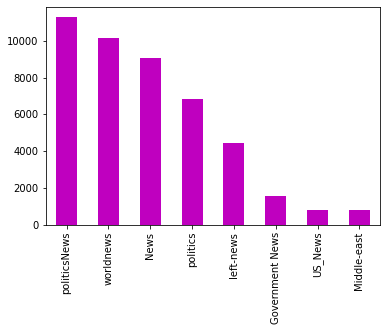

In [10]:
dataset.subject.value_counts().plot(kind="bar", color="m")

In [53]:
# dataset.subject.value_counts()

# typer = []
# columns = ['politicsNews','worldnews','News','politics','left-news','Government_News','US_News','Middle-east']
# for i in range(len(dataset.subject.value_counts())):
#     b = dataset.subject.value_counts()[i]
#     typer.append(b)


# ddd = pd.DataFrame(data=typer, index=columns, columns=['Total'])
# ddd.index.name = 'Group'
# ddd['Total']
# dataset.to_csv('True_False_data.gz', compression='gzip', index=False)


In [ ]:
# dataset.notna().all(axis=0)
sns.heatmap(dataset.notna(), annot=True)
plt.show()

In [13]:
dataset.notna().all()

title      True
text       True
subject    True
date       True
target     True
dtype: bool

In [14]:
dataset.drop(['title','date'],axis=1,inplace=True)

In [15]:
dataset['text'] = dataset['text'].apply(lambda x: x.lower())
dataset.head()

,text,subject,target
17876,cincinnati (reuters) - president-elect donald ...,politicsNews,True
41030,caracas (reuters) - venezuela s pro-government...,worldnews,True
15599,nothing like political cronyism to make your s...,politics,Fake
37903,beijing (reuters) - chinese distributors of ov...,worldnews,True
9963,it just doesn t get any worse than this. the i...,Government News,Fake


In [16]:
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
dataset['text'] = dataset['text'].apply(punctuation_removal)
dataset.head()

,text,subject,target
17876,cincinnati reuters presidentelect donald trum...,politicsNews,True
41030,caracas reuters venezuela s progovernment leg...,worldnews,True
15599,nothing like political cronyism to make your s...,politics,Fake
37903,beijing reuters chinese distributors of overs...,worldnews,True
9963,it just doesn t get any worse than this the id...,Government News,Fake


In [17]:
stop = stopwords.words('english')
dataset['text'] = dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dataset.head()

,text,subject,target
17876,cincinnati reuters presidentelect donald trump...,politicsNews,True
41030,caracas reuters venezuela progovernment legisl...,worldnews,True
15599,nothing like political cronyism make stomach c...,politics,Fake
37903,beijing reuters chinese distributors overseas ...,worldnews,True
9963,get worse idea giving veterans best health car...,Government News,Fake


In [18]:
print(dataset.groupby(['subject'])['text'].count())

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


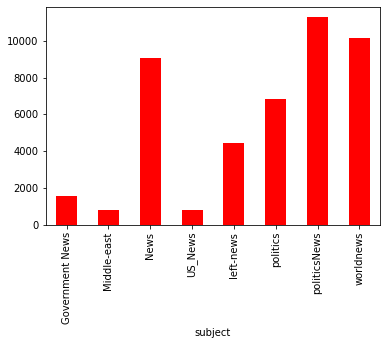

In [19]:
dataset.groupby(['subject'])['text'].count().plot(kind="bar", color='r')
plt.show()

In [20]:
print(dataset.groupby(['target'])['text'].count())

target
Fake    23481
True    21417
Name: text, dtype: int64


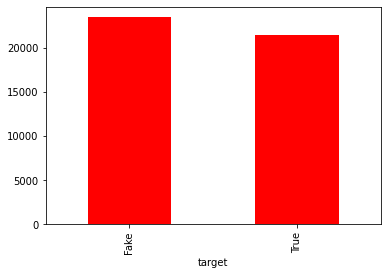

In [21]:
dataset.groupby(['target'])['text'].count().plot(kind='bar', color='r')
plt.show()

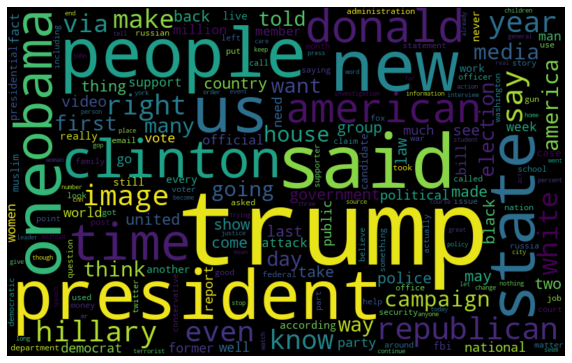

In [29]:
# Word Cloud for False news:
select_fake_data = dataset[dataset['target']=='Fake']
all_text = ' '.join([text for text in select_fake_data.text])

wordcloud = WordCloud(width= 800, height= 500, max_font_size = 150, collocations = False).generate(all_text)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

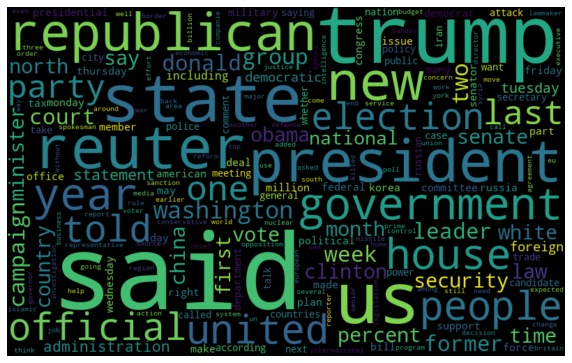

In [30]:
# Word Cloud for real news:
select_fake_data = dataset[dataset['target']=='True']
all_text = ' '.join([text for text in select_fake_data.text])

wordcloud = WordCloud(width= 800, height= 500, max_font_size = 150, collocations = False).generate(all_text)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
x = dataset['text']
y = dataset['target']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.35, random_state=45)

In [24]:
# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train set, transform test set
x_train=tfidf_vectorizer.fit_transform(x_train) 
x_test=tfidf_vectorizer.transform(x_test)

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', max_depth = 20, splitter='best', random_state=87)
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

In [26]:
print(accuracy_score(y_test, y_pred)*100)

99.49729557747375


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      8196
        True       0.99      1.00      0.99      7519

    accuracy                           0.99     15715
   macro avg       0.99      1.00      0.99     15715
weighted avg       0.99      0.99      0.99     15715



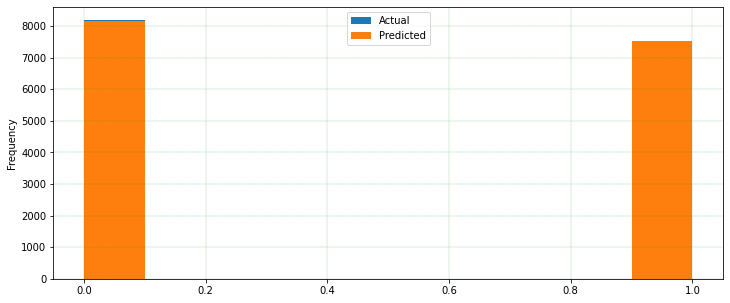

In [28]:
# Check the difference between the actual value and predicted value.
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Actual'] = df['Actual'].map({'True': 1, 'Fake': 0})
df['Predicted'] = df['Predicted'].map({'True': 1, 'Fake': 0})

# Now let's plot the comparison of Actual and Predicted values
df.plot(kind='hist', figsize=(12,5))
plt.grid(which='major', linestyle='--', linewidth='0.2', color='green')
plt.legend(loc="upper center")
plt.show()

c:\users\abuba\envs\test\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


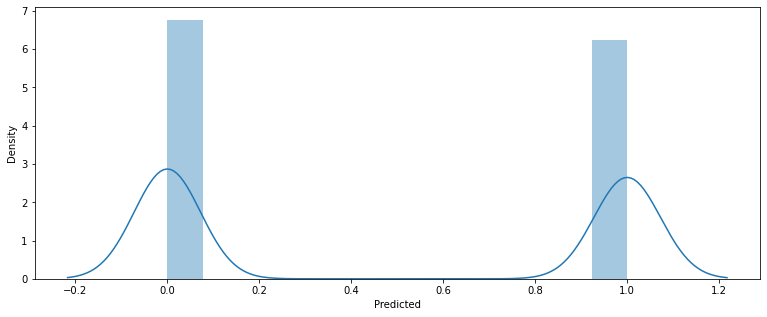

In [30]:
plt.figure(figsize=(13, 5))
plt.tight_layout()
sns.distplot(df['Predicted'])
plt.show()

In [119]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [31]:
from sklearn.svm import SVC
# svm = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
#       decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
#       max_iter=-1, probability=False, random_state=None, shrinking=True,
#       tol=0.001, verbose=False)
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
predictions = svm.predict(x_test)

In [32]:
svm_score=accuracy_score(y_test,predictions)
print(f'Accuracy: {round(svm_score*100,2)}%')

Accuracy: 99.33%


In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99      8196
        True       0.99      1.00      0.99      7519

    accuracy                           0.99     15715
   macro avg       0.99      0.99      0.99     15715
weighted avg       0.99      0.99      0.99     15715



In [34]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_predictions = rfc.predict(x_test)

In [35]:
rfc_score=accuracy_score(y_test,rfc_predictions)
print(f'Accuracy: {round(rfc_score*100,2)}%')

Accuracy: 98.67%


In [36]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      8196
        True       0.98      0.99      0.99      7519

    accuracy                           0.99     15715
   macro avg       0.99      0.99      0.99     15715
weighted avg       0.99      0.99      0.99     15715



In [37]:
lrc = LogisticRegression()
lrc.fit(x_train, y_train)
lrc_predictions = lrc.predict(x_test)

In [38]:
lrc_score=accuracy_score(y_test,lrc_predictions)
print(f'Accuracy: {round(lrc_score*100,2)}%')

Accuracy: 98.45%


In [39]:
print(classification_report(y_test,lrc_predictions))

              precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      8196
        True       0.98      0.99      0.98      7519

    accuracy                           0.98     15715
   macro avg       0.98      0.98      0.98     15715
weighted avg       0.98      0.98      0.98     15715



In [40]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test) 

In [41]:
knn_score=accuracy_score(y_test,knn_pred)
print(f'Accuracy: {round(knn_score*100,2)}%')

Accuracy: 61.58%


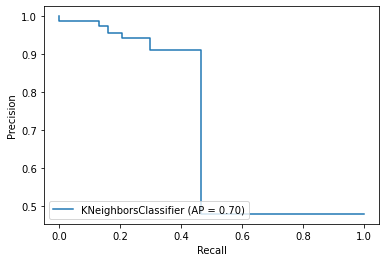

In [42]:
plot_precision_recall_curve(knn,x_test,y_test)

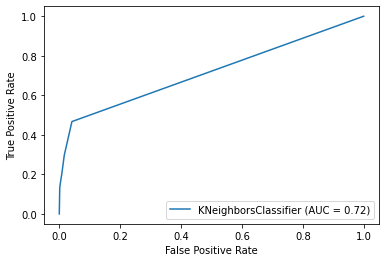

In [43]:
plot_roc_curve(knn,x_test,y_test)

In [44]:
import xgboost as xgb

xgbm = xgb.XGBClassifier(random_state=1)
xgbm.fit(x_train, y_train)
xgbm_pred = xgbm.predict(x_test)
xgbm_score = accuracy_score(y_test, xgbm_pred)
print(f'Accuracy: {round(xgbm_score*100,2)}%')

Accuracy: 99.65%


In [53]:
print(classification_report(y_test, xgbm_pred))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      8206
        True       1.00      1.00      1.00      7509

    accuracy                           1.00     15715
   macro avg       1.00      1.00      1.00     15715
weighted avg       1.00      1.00      1.00     15715



In [54]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(x_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
pac_pred=pac.predict(x_test)
pac_score=accuracy_score(y_test,pac_pred)
print(f'Accuracy: {round(pac_score*100,2)}%')

Accuracy: 99.34%


In [55]:
print(classification_report(y_test, pac_pred))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      8206
        True       0.99      0.99      0.99      7509

    accuracy                           0.99     15715
   macro avg       0.99      0.99      0.99     15715
weighted avg       0.99      0.99      0.99     15715



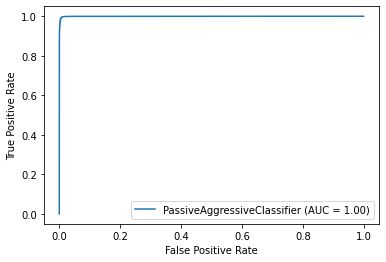

In [56]:
plot_roc_curve(pac,x_test,y_test)

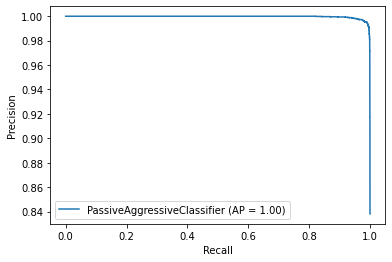

In [57]:
plot_precision_recall_curve(pac,x_test,y_test)

In [46]:
from sklearn.naive_bayes import MultinomialNB

mnlb = MultinomialNB()
mnlb.fit(x_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
mnlb_pred=mnlb.predict(x_test)
mnlb_score=accuracy_score(y_test, mnlb_pred)
print(f'Accuracy: {round(mnlb_score*100,2)}%')

Accuracy: 93.92%


In [47]:
print(classification_report(y_test, mnlb_pred))

              precision    recall  f1-score   support

        Fake       0.95      0.93      0.94      8196
        True       0.92      0.95      0.94      7519

    accuracy                           0.94     15715
   macro avg       0.94      0.94      0.94     15715
weighted avg       0.94      0.94      0.94     15715



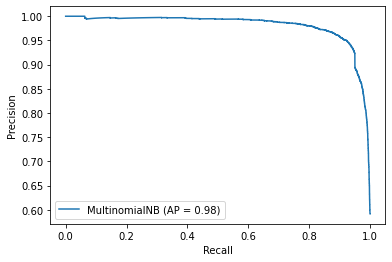

In [60]:
plot_precision_recall_curve(mnlb,x_test,y_test)

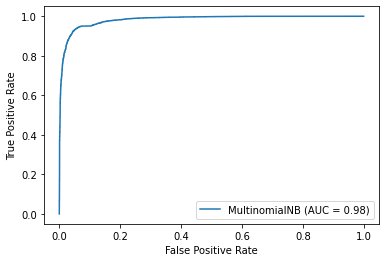

In [61]:
plot_roc_curve(mnlb,x_test,y_test)

In [62]:
from math import sqrt
import handcalcs.render

In [65]:
a=2
b=-5
c=3

In [105]:
%%render
x = (-b+sqrt(b**2-4*a*c))/2*a

<IPython.core.display.Latex object>

In [191]:
def lebel(yourtext):
    vect_text = tfidf_vectorizer.transform([yourtext])
    vect_text_pred = dtc.predict(vect_text)
    print(vect_text_pred)

In [193]:
lebel(dataset['text'][10])

['True']


In [220]:
text = 'US President Donald Trump on Monday arrived in India on a two-day visit and attended the Namaste Trump event in Gujarats Ahmedabad'
data = lebel('text')
type(data)
if data is None:
    result = 'rakib'
    print(result)

['Fake']
rakib
